<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/notebookes/LinearRegressionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outline
- Load data in repo
- Introduction (Purpose + scope)
- Body
  - Linear regression is solving linear equations approximately.
     - Matrix notation of linear regression equations.
     - build X matrix with loaded data
     - Solve " X β = y"
  - How to solve uncertain set of linear equations?
  - The line fitting.
  - Connection between method of least squares and the distribution of error terms.
- Conclusion:
- Appendix: Some linear algebra
  - questions
  - switch to another view: column space
  - revisit two questions
  - Go back a bit, what if no solution, what about projection ...
  - rank of X, stuff about the projecting
  - what if it has solution


##Git Setup

In [ ]:
import google.colab
repo_path = 'AminehTechnicalWritings'
!git -C $repo_path pull origin || git clone https://github.com/aminehd/AminehTechnicalWritings/ $repo_path
local_clone = '/content/' + repo_path
!git config --global user.email "amineh.dadsetan@gmail.com"
!git config --global user.name "Amineh Dadsetan"

In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/content/AminehTechnicalWritings/src')
import sampling_utils as su
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
population = su.get_population(local_clone + '/data/population.npz')
population.shape

(300000, 2)

## Introduction
In this notebook, I would like to go through the linear regression concepts. It's in first chapter of all AI/ML books. Usually the author starts very inncocently by showing some plots of dots, scattered approximately along a line.

 Then they flash a bunch of matrixes at you. Just a bit before end of the chapter,  they make an apeal to you to believe it was all about Maximum liklihood framework and normal probability distribution, all along.

  Maybe it's only me, but I'm always lost after the matrix notation.
 That's why I wanted to gain a cohesive understanding of the whole flow and how each step leads to another. This notebook is what I have learnt about it.


I have created a [jupyter notebook](https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/DistributionsOfAspectsOfData.ipynb) to generate some random data.

At the end of each notebook, I save artifact to the repo so we can load them in any subsequent notebook. 👾 📦

The random data from  previous notebook follows the assumption of linear regression. This assumes that if you subtract a linear combination of predictors from the response, the result will have a standard normal distribution. Hence, you can fit a linear model to a given sample.



It's important to pause a bit and notice the differenc of a given sample of size n and the whole population. Let's look at a given sample. ⏸






In [ ]:

sampler = su.PopulationSampler(population)
x_samp_index, x_samples = sampler.set_sample_xs(100)
resp = np.array(list(sampler.sample_response()))
x, y = resp[:, 0], resp[:, 1]


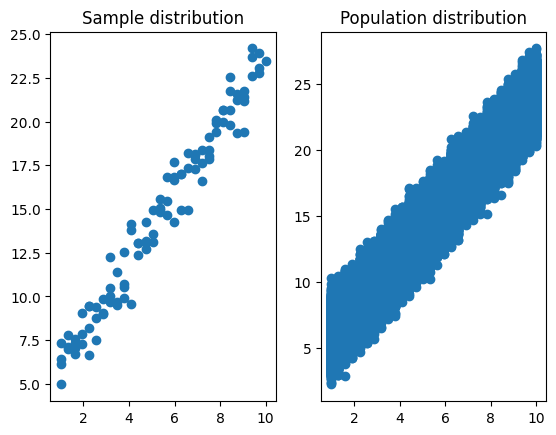

In [ ]:
fix, axes = plt.subplots(ncols=2)
# sample[:,0], sample[:,1]
axes[0].scatter(x, y)
axes[0].set_title('Sample distribution')
axes[1].set_title('Population distribution')
axes[1].scatter(population[:,0], population[:,1]);


### Linear regression is solving linear equations approximately

Plotting the responses versus predictors reveals a noticeable linear pattern, both in the sample and population datasets. In our case it faintly resembles a line in 2D space that can be described with two numbers: slope and intercept.

Fitting a linear model to data is similar to solving n equations with p variables, with the goal of finding the coefficient.  There is  one small difference: fitting linear model is approximate, while solving system of linear equations is exact solutions.


Going back to history of linear regression, the first use of fitting linear models to observed data originated from the field of astronomy. Scientists attempted to determine fixed parameters related to the positions and motions of celestial bodies based on astronomical data, under the assumption of a linear model.
However, these observations were subject to errors, leading to instances where the equations had no solutions.

Their trick was to introduce an error term, ensuring that the equations would always have at least one solution.

Likewise, we can add an error term to the right side of our equations, ensuring that the system always has a solution. However, the caveat is that multiple solutions will exists, each with different error term values and we need to find a criteria that which set of errors are better overall. Or alternatively we can decide  which solution is more likely to be the correct one, if we have a distribution on the error terms.  But hold off on that that part and let's focus on the system of linear equations for now.



The equations for a given sample of size n looks likes:
$$
\begin{align}
y_1 &= \beta_1 x_{11} + \cdots + \beta_p x_{1p} + \beta_0 + \epsilon_1\\
y_2 &= \beta_1 x_{21} + \cdots + \beta_p x_{2p} + \beta_0 + \epsilon_2\\
&\vdots \\
y_n &= \beta_1 x_{n1} + \cdots + \beta_p x_{np}  + \beta_0 + \epsilon_n
\end{align}
$$


At this point the problem statement is more forma. In other word, asking to find the best line that fits the sample data is not as clear as asking to solve a set of linear equations. However, we haven't yet talked about how to solve them.

Before delving into solving the linear equtions, lets see some algebraic interpretation of this.




### Matrix notation of linear regression.

Samples are a set of tuples. To use linear algebra, we can switch to their notations, which is vectors and matrices.
Each predictor can be viewed as a row vector, (e.g, $x_i = [ x_{i,1}, ..., x_{ip}]^T$.)  . It means predictors are n vecotres each of p dimensions. You can even stack them on top of each other: 🦣
$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & \ldots & x_{1p} \\
x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \ldots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\vdots \\
\beta_p
\end{bmatrix}
+
\begin{bmatrix}
\beta_0 \\
\beta_0 \\
\vdots \\
\beta_0
\end{bmatrix}
+ ϵ$$

You can see that the intercept is a vector that is n-times repeatition of $\beta_0$ ( a bit awkward 🤷).

A tiny trick helps putting $\beta_0$ with rest of $\beta_i$'s. At least help visually. 🎉 🧙
$$
y =
\begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1p} \\
1 & x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots &\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_p \\
\end{bmatrix}
+ ϵ
$$

For ease, we refer to the above augmented matrix as $\tilde{x}$:
$$
\tilde{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1p} \\
1 & x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots &\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{np}
\end{bmatrix}
$$
Just to make it a bit easier, we rename $\tilde{X}$ to X again. So by referring to $X$ we reffer to the augmented X.



### build X matrix

HERE!!! construct X from the data. Play with it




Lets build the X matrix


In [ ]:

X = np.c_[np.ones(100), x]
print(f"Shape of X: {X.shape}")
print(f"Rank of X: {np.linalg.matrix_rank(X)}")



Shape of X: (100, 2)
Rank of X: 2


###  Solve " X β + ϵ= y"

Putting all observation in a matrix, yields one line equation that is equivalent to solving the system of linear equations  that is :
$$ \textbf{X} \beta + \epsilon = y$$

Solving such equation would have been a standard procedure, if there were no error term $\epsilon$ or uncertanty in other words.

Any solution of the matrix equation finds values for the $\beta$ and values for $\epsilon$.  Intuitively, we would like a solution that yields the minimum value of $\epsilon$. But as $\epsilon$ is an n-dimensional vector,  how do we compare them?

One approach is to minimize $||\epsilon||$ (the L2 norm of the vector), which equates to minimizing $||Ax - bX||$. Various techniques, like using derivatives, can achieve this minimization.



HERE!!! my favorite approach is to project y into column space of X and solve it. link the appendix

HERE!!! continue with second question and then move all X(XTX)-1 craziness to here, **name** my important eqs for easier reference

2. If we solve $\textbf{X} \beta  = \hat{y}$ and find a solution for $\beta$ , and plug those values in $\textbf{X} \beta + \epsilon = y$, resulting $\epsilon = ||Ax -b ||$ is minimized. The intuitvive reason is that $\hat{y}$ is closest point to $y$ that exist on the span.

3. With all that being said, we need two steps: step one is to find $\hat{y}$, and step two is solve $\textbf{X} \hat{\beta}  = \hat{y}$.

2. To find such $\hat{y}$, (closest point to $y$ on the column space of X) we can use a matrix that project any vector to vector space made by span of columns of X. This matrix is a change of basis to column space of $X$.

3. Finding such matrix really depends on X features For example if X is a square matrix with all orthogonal columns, no such projection is needed cause X spans the whole dimension. If X has orthogonal columns but not square, that projection is $XX^T$. In general case it is $X(X^TX)^{-1}X^T$. Lets call this $X^+$ from now on.  The proof has to do with svd and stuff.


Lets calculate $X^+$ for our sample. HERE!!!



In [ ]:
X_plus = X @ np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X)
X_plus.shape
y.shape
y_hat = X_plus @ y

Based on the matrix notation, we can construct the matrix X:

At this point we claim that `y_hat` is in the column space of X. In fact we also claim that `y_hat` is the prediction obtained my method of least square.



In [ ]:
b, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

estimate_y = b[0] + b[1] * x
print(f"L2 norm of difference of estimat_y with y_hat: {np.sum(np.square(estimate_y - y_hat)):.2e}")


L2 norm of difference of estimat_y with y_hat: 8.94e-27


As you can see the  norm of the distance of the estimated_y and y_hat is  almost 0 (8.94e-27). So to find estimated response, all you need is multiply `X_plus` by `y`.   Similarly you can  HERE!!!!!!!!




HERE!!!
we arrive at:
$${\displaystyle {\widehat {\beta }}=(X^{\operatorname {T} }X)^{-1}X^{\operatorname {T} }y}$$
HERE!!! Why the books calculate $\hat{\beta}$ instead of $\{beta}$


### what motivates $||Ax -b ||$ as a loss function
We formulate uncertainty as a vector $\epsilon$ that sample from a normal distribution.
If you like to see more reasoning behind why we picked $||Ax -b ||$ as lose function, or as a function to minimize, I can add some more to it. HERE!!!
In context of linear regression, $\widehat{ \beta}$ is called [**ordinary least squares estimator**](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem).

In fact under some assumption it is the BEST estimator. But what are those assumption and why is it so greate a estimator.
The assumptions

2. $\epsilon_i$ has mean zero.
3. $\epsilon_i$ has same variance for all i: ${\displaystyle \operatorname {Var} (\varepsilon _{i})=\sigma ^{2}<\infty }$
4. Distinct error terms are uncorrelated


In what sense is $ {\widehat {\beta }}$ the best estimator? First of all, it is best estimator among all linear and unbiased ones. That means
1. $ {\widehat {\beta }}$ is linear in y ( i.e., ${\displaystyle {\widehat {\beta }}_{j}=c_{1j}y_{1}+\cdots +c_{nj}y_{n}}$)
2. Being unbiased means ${\displaystyle \operatorname {E} \left[{\widehat {\beta }}_{j}\right]=\beta _{j}}$. We demonstrate it with data in a bit

The best linear unbiased estimator (BLUE) of the vector
${\displaystyle \beta }$ of parameters
${\displaystyle \beta _{j}}$ is one with the smallest mean squared error for every vector ${\displaystyle \lambda }$ of linear combination parameters. This is equivalent to the condition that (HERE!!! i didn't understand this from wikipedia)

$${\displaystyle \operatorname {Var} \left({\widetilde {\beta }}\right)-\operatorname {Var} \left({\widehat {\beta }}\right)}$$


It turns out that the OLS estimator which is the best linear unbiased estimator  **Also** minimizes the sum of squares of residuals. Text books usually start with finding an estimator that minimizes the squares of residuals without explaining the BLUE.



The OLS estimator also  maximizes the likelihood function (whatever that is) when the random errors are assumed to have normal distributions with the same variance.

Statisticians typically motivate ordinary least squares by the [principle of maximum likelihood](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem)  because of this feature.

HERE!!! use the loaded data to show XTX effect.

### Line fitting

while it is nice to visualize the data point using second view, we mainly use the first view to solve the system of equations. Let's find such hyperplane for our sample data points ( or n vectors of 2-dimensional )

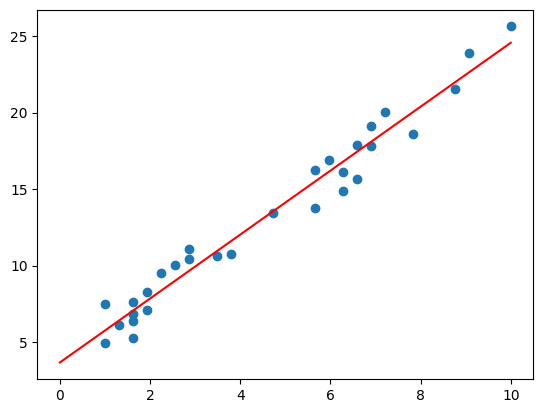

In [ ]:
# fit regression for sample of shape (30, 2)
slope, intercept = np.polyfit(sample[:, 0], sample[:,1], 1)
fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1])
ax.plot(np.linspace(0, 10, 40), slope * np.linspace(0, 10, 40) + intercept, 'r')

## Connection between method of least squares and the Error terms

Without the epsilon term, finding the regression parameters (or $\beta_i$'s) looks like solving multiple linear equations and there is standard prodecures for it. But now what do we do with epsilon term.

Let's take a look into the history of it.

The method of least squares grew out of the fields of astronomy, as scientists tried to provide solutions to the challenges of navigating the Earth's oceans.

Their astronomical observations were in form of lots of equations with lots of variables. But observations always have error in them. So there was cases that these equation do not have any solution. However, they really wanted a solution.

Their trick was to add an error term, and expect that equations to always have some solution. Typically, multiple solutions exist, each with different error term values. The best solution is the one that minimizes the overall error.

How to define the criterion for overal error term? Which function of error do we want to minimize? One possible such funtion is the sum of squares of errors. The modthod that finds the linear regression coefficients by minimizing the sum of square of errors is called method of least squares. Nowdays, method of least squares is part of Regression, particularly it is one possible loss function.


The first clear and concise exposition of the method of least squares was published by [Legendre](https://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805.

However, In 1809 Carl Friedrich Gauss published his method of calculating the orbits of celestial bodies.This naturally led to a priority dispute with Legendre. However, to Gauss's credit, he went beyond Legendre and succeeded in connecting the method of least squares with the principles of probability and to the normal distribution. We'll see how the method gets linked to the probability distribution of errors.

But why method of least square is a good choice for finding the coefficients? the answer to this question depends on two things: firstly on the assumptions about error distribution, and secondly, on what are we looking for in a solution.  

By picking a criterion for solving the equations, in practice, we find a estimate $\hat{\beta_j}$ for $\beta_j$ in below equations. This estimate is a function of $X$ and $y$.

$$
\begin{align}
y_1 &= \beta_1 x_{11} + \cdots + \beta_p x_{1p} + \beta_0 + \epsilon_1\\
y_2 &= \beta_1 x_{21} + \cdots + \beta_p x_{2p} + \beta_0 + \epsilon_2\\
&\vdots \\
y_n &= \beta_1 x_{n1} + \cdots + \beta_p x_{np}  + \beta_0 + \epsilon_n
\end{align}
$$



If we decide to minimize the sum of least square of errors, the estimator $\hat{\beta}$ will be called **ordinary least squares estimator (OLS)** and is below function
$$
\beta_j =  (X^TX)^{-1}X^Ty
$$

⏰  Now, wait for it ..., it turns out that OLS is the **best unbiased linear estimator** or [BLUE](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) under a few assumptions about the set of error random variables, $\epsilon_i$:
- They have mean zero: $E[\epsilon_i]= 0$
- They are homoscedastic, that is all have the same finite variance: $Var(\epsilon_i) = \sigma^2$ for all i and
- Distinct error terms uncorrelated: $Cov(\epsilon_i, \epsilon_j) = 0, \forall i \neq j.$

⭐ We can answer the question we asked a while ago: why method of least square is a good choice for finding the coefficients, specificaly when the error terms has a normal distribution?  Because under the assumption of normal distibution and uncorrelated error terms, the OLS estimator (that is result of using method of least squares) is going to be Best unbiased linear estimator or BLUE.

🔹 The term BLUE suggests that there are other good estimators. OLS is the best one among the linear and unbiased ones. The fact that OLS estimator is linear in term of y's is easy to verify.

However, we haven't explained what unbiased means.

Here is an observation that helps answer above question:

WHen there is no predictors and error follows normal distribution, mean of responses is what optimizes the sum of squared errors.
In that case $y = [y_1, ..., y_n]^T$ and we would like to find best $\beta_0$ to fit $y = \hat{\beta_0 }$. Then OLS would minimize $\sum{(y_i - \hat{\beta_0})^2}$.

If we use the $\hat{\beta_0}$ calculated for the sample to estimate the $\beta_0$ for the whole population or better to say the real y for population, this estimation is *unbiased*. It means on average we expect $\hat{\beta_0}$ to equal to ${\beta_0}$. Hence an unbiased estimator does not systemically over- or under-estimate the true value.

So basically when predictors are 0 dimensional,  benefit of using method of least square as loss function, estimators would be unbiased over all samples.


  In fact under the assumption of normally distributed errors, the least squares estimates have desirable properties such as being unbiased and having minimum variance among all linear estimators. That is one of the reasons that  method of least squares and normal distribution are tied together.
  
  



## Conclusion
We looked at linear regression problem in the form of solving multiple linear equations. Then we looked at two ways of interpreting a solution with matrixes (or linear spaces). Finally we contemplated on the error terms, method of least squares, and how the mothod is connected to the distribution of error terms.


  
  
This concludes this not book. Next notebook we try to look at the model coefficients ($\beta_i$'s ) as summary statistics defined on samples. You can also think of them as measures since samples are subsets.  

Then we look at  expected value of sample statistices over multiple sampling. Also we look at variance of stuff within sample, and variance of sample   stat over several samplings. This indeed is an intersting case when sample stat is defined to be the mean of sample.


These can help understand concept of Standard Error and F-test better.



## Appendix: Some linear algebra
Consider this matrix equation:
$$\textbf{X} \widehat{\beta}  = \widehat{y}$$
$\textbf{X}$ and $\widehat{y}$ are known and the goal is to find unkonwn $\widehat{\beta}$.
Most important question is  when  this equation have answer? To answer this question, let's switch to another view of the equation:


A standard process is to exapnd the matrix notation as a scaled sum of columns of X.

$$
\widehat{y} =
\mathbf{X}.
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_p \\
\end{bmatrix}
= \\
\beta_0 *
\begin{bmatrix}
1\\
1 \\
\vdots\\
1
\end{bmatrix}
+ \cdots + \beta_j *
\begin{bmatrix}
x_{1j} \\
x_{2j} \\
\vdots \\
x_{nj}
\end{bmatrix} + \cdots + \beta_p *
\begin{bmatrix}
x_{1p} \\
x_{2p} \\
\vdots \\
x_{np}
\end{bmatrix} + \epsilon =\\
\sum_{i \in [0, ...,p]} \beta_i * \mathbf{x}_i
$$

Not that $\mathbf{x}_i$ denotes the i-th column of X.
We just ended up with a $\sum_{i \in [0, ...,p]} \beta_i * \mathbf{x}_i $

The algebraic interpretation is to find a linear combination of these p + 1 vecotors. Two algebraic concepts pop up here first, linear **span** of a set of vectors, second column space of a matrix. Basically, X can be viewed as set of its column vectors.  Subsequently, column space of X is linear span of all of its columns $\mathbf{x_i}$.

To find $\sum_{i \in [0, ...,p]} \beta_i * \mathbf{x}_i = \widehat{y}$ is to find a linear combination of columns of X that equals to $\widehat{y}$.
Lets revisit the question we asked above.

**Question 1**: When does this equation have answer?

**Answer**: The equation has answer if and only if $\widehat{y}$ resists on the vector space of linear span of $\mathbf{x_i}$'s.

What if the equation doesn not have an answer? By the way this is why the linear regression equation has the $\epsilon$ term in it meaning that there is no exact solution for matrix equation. Also this is the reason we denote **sample** regression coefficient by $\widehat{\beta}$ meaning that we don't have access to the exact $\beta$.






Lets work on another matrix equation that resembles **line fitting** equation:
$$ \textbf{X} {\beta}  + \epsilon= {y}$$

The goal here is to come up with an  equation that always have an answer.  

 If y is not in column space of X, we can find closest $\widehat{y}$ that is in the span of columns of $X$ and solve the equation for that:
 $$ \textbf{X} \widehat{\beta}  = \widehat{y}$$

How can we project $y$ to columns space of $\mathbf{X}$?
1. Turns out it really depends. For example if $\mathbf{X}$ is a square matrix, then every vector of right dimension is already on column space of $\mathbf{X}$.

2. If $\mathbf{X}$ columns are orthonormal basis, $\mathbf{X}\mathbf{X}^T$ is desired projection.
3. In the most general case $ \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is such a projection ( In fact a change of basis).


Instead of finding $\beta$, we set out to find $\widehat{\beta}$ in
$$\widehat{y} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T y =  \mathbf{X} \widehat{\beta}$$ 🤯





HERE!!!! make a line for $\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}X^T$ and name it.
While $\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}X^T y =  X \widehat{\beta}$ might have multiple solution, one trivial solution is $\hat{\beta} = (X^TX)^{-1}X^T y$ by removing X from the right and left side

HERE!!!(easier way to arrive at it?what if y is in column space of X? does it simplify? see with data)
 HERE!!!
**sources**
1. https://en.wikipedia.org/wiki/Projection_(linear_algebra)#Formulas
2. https://www-users.cse.umn.edu/~rejto/4242/4242_2final_sol3.pdf
3. https://math.stackexchange.com/questions/1816364/the-svd-solution-to-linear-least-squares-linear-system-of-equations


HERE!!! put all X(XTX)-1 craziness to here, **NAME** my important eqs for easier reference 🌨


Now lets sample a set and try these matrices.
Let's construct the  matrix X for the data we sampled. We can check some algebraic measures on matrix X then. I would suggest try to answer a few questions for yourself, such as
1. what is the shape of X?
2. what is the rank of X?